In [1]:
# Code to perform significance testing on CMIP6 ensemble + observational data
# Author: Nathan Erickson
# Date: 10/26/2021
# Coded with Python 3.8.10

In [2]:
# Directory management

import os
file_path = os.path.join(os.getcwd(),os.pardir,'output/')
os.chdir(file_path)
print(os.getcwd())

/home/nathane1/Thesis/output


In [3]:
# Read in data for significance testing

import pandas as pd
from scipy import stats

#data = pd.read_csv('djf_data.csv', index_col = 'Unnamed: 0')
data = pd.read_csv('monthly_niño_bigtimesteps.csv', index_col = 'Unnamed: 0')
if '1851' in data.index[0]:
    data = data.T
#print(data)

In [4]:
# Select future/historical data
future_data = data.T.loc[[(int(data.columns[datetime][:4]) >= 2050) 
                              for datetime in range(len(data.columns))]]
historical_data = data.T.loc[[(int(data.columns[datetime][:4]) > 1850) &
                              (int(data.columns[datetime][:4]) <= 1900)
                              for datetime in range(len(data.columns))]]
# Hi, this needs to be generalized!!!

In [5]:
future_magnitude = []
significance_future = []
for model in future_data.columns:
    future_magnitude.append(stats.ttest_ind(future_data[model].dropna(), historical_data[model].dropna()).statistic)
    significance_future.append(stats.ttest_ind(future_data[model].dropna(), historical_data[model].dropna()).pvalue)

In [6]:
significant_future = pd.DataFrame(data = significance_future, index = future_data.columns, 
                                  columns = ['Significant Differences in Future vs. Historical'])
significant_future = significant_future.dropna()

In [7]:
## HAMMER THIS PART OUT BETTER!
sig_hue = {}
for sindex,sim in enumerate(significant_future.index):
    if future_magnitude[sindex] > 0:
        sig_hue[sim] = 'r'
    if future_magnitude[sindex] < 0:
        sig_hue[sim] = 'b'
#significant_future.insert(0,'Significant Shading',sig_hue)

warming = dict((model,color) for model,color in sig_hue.items() if  color == 'r')
cooling = dict((model,color) for model,color in sig_hue.items() if  color == 'b')

In [8]:
pd.set_option('display.max_rows', 10)
len(significant_future.values)

171

In [9]:
sig_list = []
for sim in significant_future.values:
    if sim < 0.05:
        sig_list.append(sim)
len(sig_list)

0

In [12]:
mag_list = []
for sim in future_magnitude:
    if sim > 0:
        mag_list.append(sim)
len(mag_list)

AttributeError: 'list' object has no attribute 'values'

In [26]:
#significant_future.to_csv('significant_future.csv')
#pd.DataFrame(sig_hue, index=sig_hue.keys()).to_csv('sig_hue.csv', index=False)

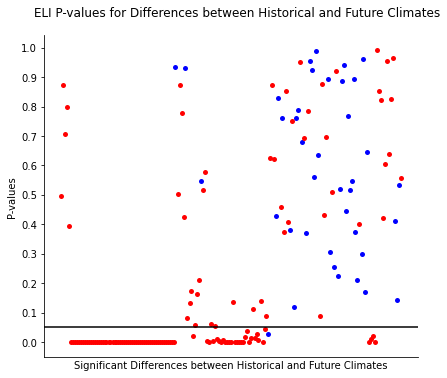

In [8]:
# Plot significance values

import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np
        
sig_plot = sns.catplot(data = significant_future.T, kind = 'strip', palette = sig_hue, aspect = 2.0) 
sig_plot.refline(y=0.05, color = 'k', linestyle = '-', zorder = 100)
sig_plot.set(yticks = np.arange(0,1.1,0.1))
sig_plot.set_xticklabels([])
sig_plot.set_xlabels('Significant Differences between Historical and Future Climates', loc = 'center')
sig_plot.set(xticks=[])
sig_plot.set_ylabels('P-values')
sig_plot.fig.suptitle('ELI P-values for Differences between Historical and Future Climates', y = 1.05)
#sig_plot.fig.suptitle('Niño 3.4 P-values', y = 1.05, ha = 'center', fontsize = 20)
sig_plot.set(xmargin = 0.05)
#plt.legend([warming,cooling],['Models with Warming Trend','Models with Cooling Trend'])

In [9]:
fig_dir = os.path.join(path,'images/')
#sig_fig = sig_plot.get_figure()
if (os.getcwd().endswith('images') == False):
    os.chdir(fig_dir)
sig_plot.savefig('sig_hf_paper_strip_plot_colored_sig.jpg', bbox_inches = 'tight')